In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
#import warnings
#warnings.filterwarnings("ignore")
#from PIL import Image

# Importing DataSet

In [5]:
cgf=pd.read_csv('CardioGoodFitness.csv')

# Read DataSet

In [6]:
cgf.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


# Find null value and data types

In [216]:
cgf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 19.1+ KB


# Find mean,median,min,max,std 

In [7]:
cgf.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [11]:
cgf.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

# Drop null values and Sum of null values

In [91]:
cgf.dropna(inplace=True)
cgf.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [98]:
cgf.isnull().values.any()

False

# Bivariate Analysis, comparing two variables

In [225]:
import seaborn as sns
def lineplot_barplot (f,f1,figsize=(25,20)):
    fig, axes = plt.subplots(2,sharex=True, figsize=(10,5))
    sns.barplot( x=f, y=f1,ax=axes[0])
    axes[0].set_title('Comparing two variables'  )
    sns.lineplot( x=f, y=f1,ax=axes[1])
    #axes[1].set_title('Finding Trend'  )

# Maritalstatus Vs Miles

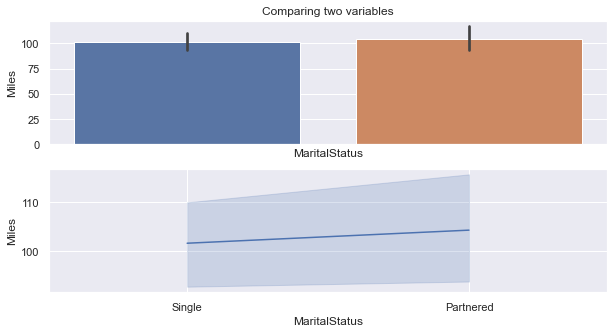

In [221]:
lineplot_barplot(cgf.MaritalStatus,cgf.Miles)

# Observation
   There is a slight difference between single and partnered in Miles.

# univariate analysis

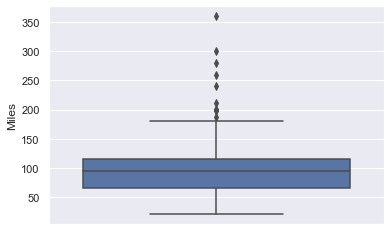

In [223]:
sns.boxplot(data=cgf,y='Miles');

# Observation:

There are some outliers in the MILES variable.

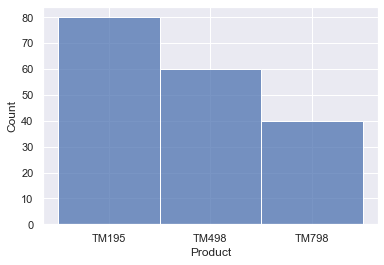

In [8]:
sns.histplot(data=cgf,x="Product");

# Product Vs Income

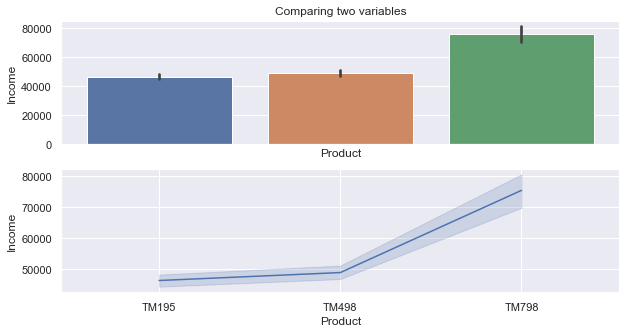

In [226]:
lineplot_barplot(cgf.Product,cgf.Income)

# Observation
    Lesser income group people intrested in TM195.
    TM195 is affordable price.
    Higher income group people(more 70000)are intrested TM798.

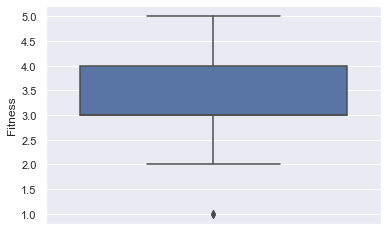

In [232]:
sns.boxplot(data=cgf,y='Fitness');

# Observation
   There is only one outlier

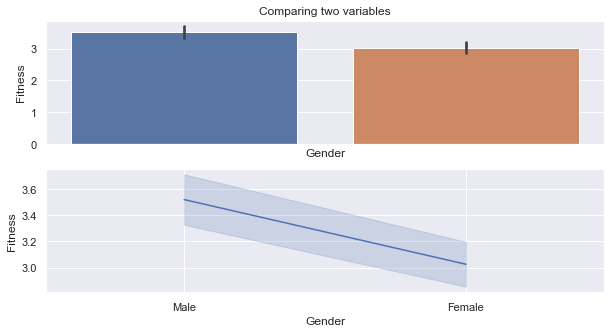

In [227]:
lineplot_barplot(cgf.Gender,cgf.Fitness)

# Observation
   Men are more fit than women.

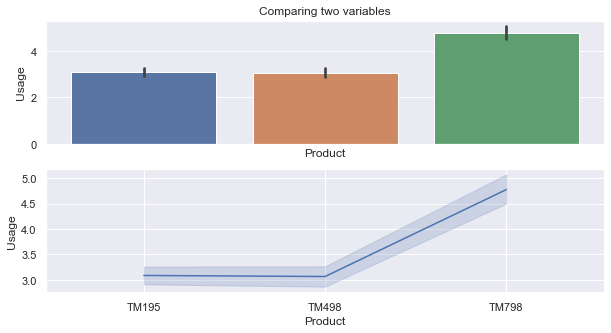

In [233]:
lineplot_barplot(cgf.Product,cgf.Usage)

# Observation
   The product TM798 is in more usage weekly wise.

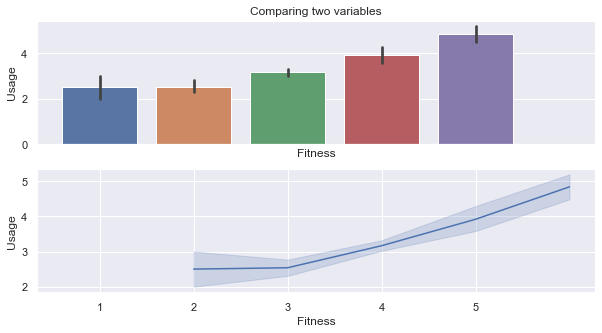

In [234]:
lineplot_barplot(cgf.Fitness,cgf.Usage)

# Observation
   People who use treadmill more than 4 times per week they are very fit.

# Zscore Method

In [110]:
from scipy import stats
cgf_copy=cgf.copy()

In [114]:
cgf_copy['zscore']=(cgf_copy.Miles-cgf_copy.Miles.mean())/cgf_copy.Miles.std()
cgf_copy.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,zscore
0,TM195,18,Male,14,Single,3,4,29562,112,0.169783
1,TM195,19,Male,15,Single,2,3,31836,75,-0.543627
2,TM195,19,Female,14,Partnered,4,3,30699,66,-0.717159
3,TM195,19,Male,12,Single,3,3,32973,85,-0.350813
4,TM195,20,Male,13,Partnered,4,2,35247,47,-1.083504


In [131]:
cgf_no_out=cgf_copy[(cgf_copy.zscore<-3)|(cgf_copy.zscore>3)]
cgf_no_out.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,zscore
166,TM798,29,Male,14,Partnered,7,5,85906,300,3.794676
167,TM798,30,Female,16,Partnered,6,5,90886,280,3.409049
170,TM798,31,Male,16,Partnered,6,5,89641,260,3.023422
173,TM798,35,Male,16,Partnered,4,5,92131,360,4.951556


In [121]:
cgf_copy[cgf_copy['zscore']>3]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,zscore
166,TM798,29,Male,14,Partnered,7,5,85906,300,3.794676
167,TM798,30,Female,16,Partnered,6,5,90886,280,3.409049
170,TM798,31,Male,16,Partnered,6,5,89641,260,3.023422
173,TM798,35,Male,16,Partnered,4,5,92131,360,4.951556


In [120]:
cgf_copy[cgf_copy['zscore']<-3]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,zscore


In [132]:
cgf_copy.shape[0]-cgf_no_out.shape[0]

176

In [134]:
cgf_no_out.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,zscore
166,TM798,29,Male,14,Partnered,7,5,85906,300,3.794676
167,TM798,30,Female,16,Partnered,6,5,90886,280,3.409049
170,TM798,31,Male,16,Partnered,6,5,89641,260,3.023422
173,TM798,35,Male,16,Partnered,4,5,92131,360,4.951556


# Heat map

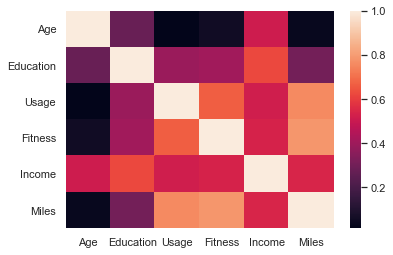

In [208]:
list=['Age','Education','Usage','Fitness','Income','Miles']
corr=cgf_copy[list].corr()
sns.heatmap(corr);

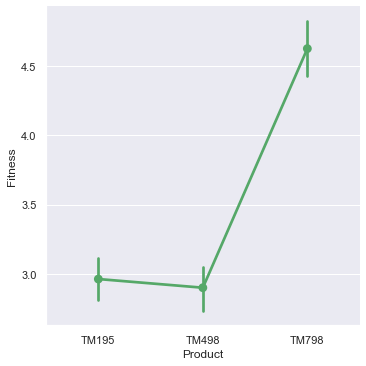

In [203]:
sns.factorplot(x='Product',y='Fitness',data=cgf_copy,color='g');

# Observation
   TM798 product is more effective than other two product.

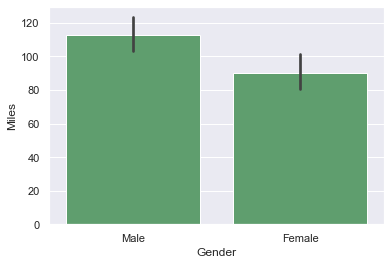

In [211]:
sns.barplot(x='Gender',y='Miles',data=cgf_copy,color='g');

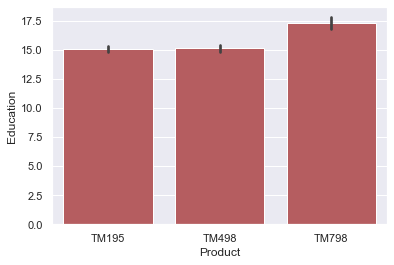

In [11]:
sns.barplot(x='Product',y='Education',data=cgf,color='r');

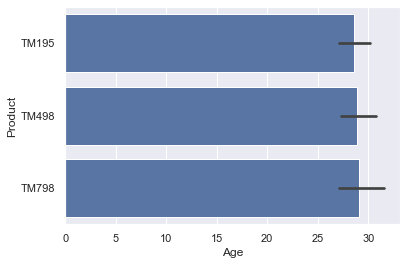

In [14]:
sns.barplot(x='Age',y='Product',data=cgf,color='b');

/Users/Prem/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


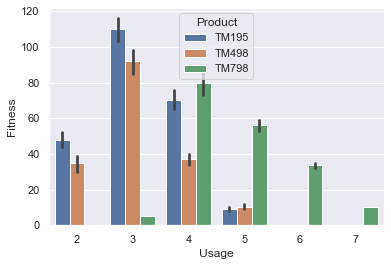

In [9]:
sns.barplot(cgf['Usage'],cgf['Fitness'],hue=cgf['Product'],estimator=sum);

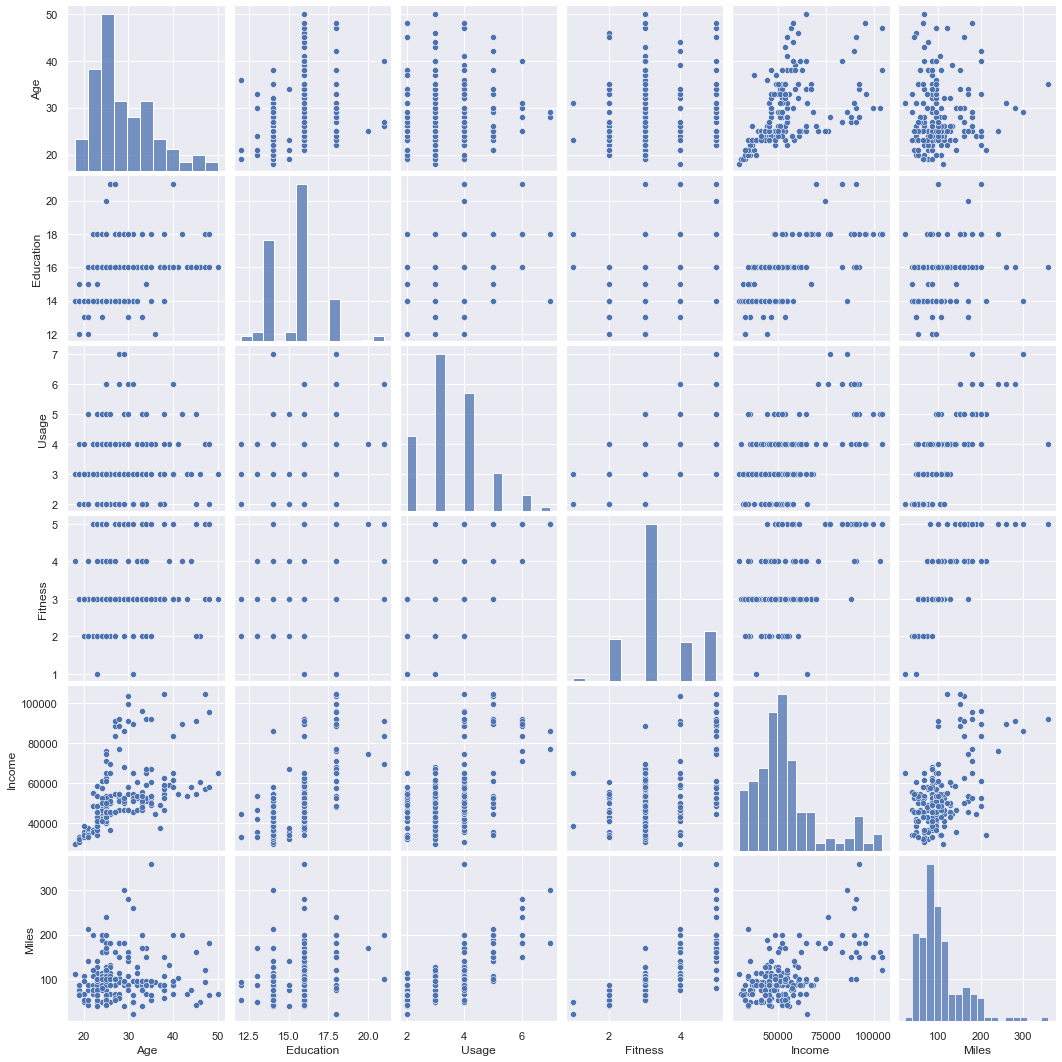

In [48]:
sns.pairplot(cgf);

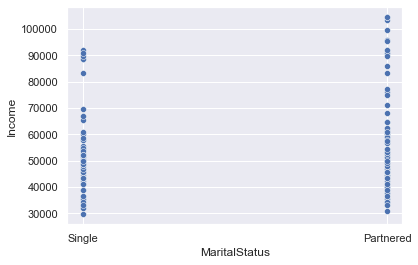

In [214]:
sns.scatterplot(cgf['MaritalStatus'],cgf['Income']);

# Observation
   partnered earn more than single

/Users/Prem/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


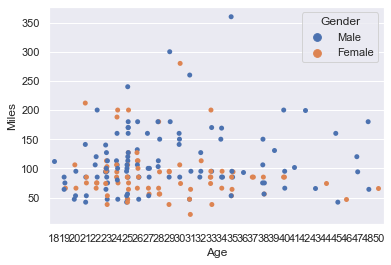

In [19]:
sns.stripplot(cgf['Age'],cgf['Miles'],hue=cgf['Gender']);

/Users/Prem/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


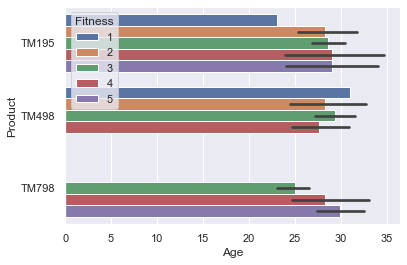

In [17]:
sns.barplot(cgf['Age'],cgf['Product'],hue=cgf['Fitness']);

# Observation
   Age below 38 years run more miles

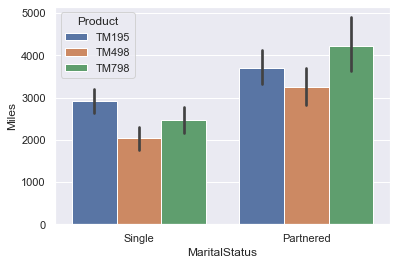

In [215]:
sns.barplot(cgf['MaritalStatus'],cgf['Miles'],hue=cgf['Product'],estimator=sum);

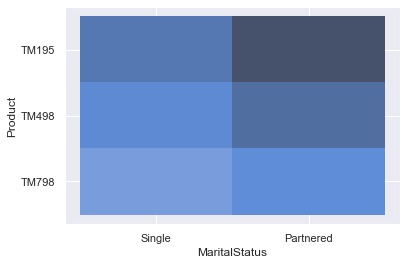

In [29]:
sns.histplot(x='MaritalStatus',y='Product',data=cgf,color='b');
#sns.histplot(data=cgf,x="Marital");

# Observation
   partnered are willing to buy treadmills and they will use efficiently.

/Users/Prem/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


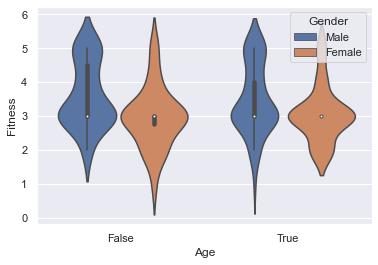

In [22]:
sns.violinplot(cgf['Age']<30,cgf['Fitness'],hue=cgf['Gender']);

# Insights and Recommendations

# Insights
   Male will use the treadmill than female. 
   People with age less than 35 are fit.
   TM798 treadmill sale are higher than TM498,TM195. 
   The people who earn more only they are buying TM798.
   People tend to use TM798 more than TM498,TM195 based on weekly data.
   Partnered use treadmill more than single.
   Educated people are more inclined towards TM798.
   Functionality wise ranking(1 being highest) of products using fitness as parameter.
   First rank - TM798.
   second rank - TM195.
   last rank - TM498.
   TM195 is highest selling of all.

# Recommendation
   
   TM498,TM798 product need to improve sales wise.
   Tm498 need to improve quality or functionality wise.
   TM195 low cost,efficent and suitable for all Fitness level and also have the highest sales.
   TM798 cost to be reconsidered and should be promoted.
   Marketing campaign should be done for both male and female to increase usage of female customer.